# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 8

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 35 баллов


<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  40 баллов
* Задача 4 &mdash;  15 баллов




-----

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)

#### <b><font color="blue">Легкая часть</font></b>
### Задача 1

В данной задаче мы продолжим работать с датасетом о диабете, с которым вы познакомились на занятии.

In [3]:
data = load_diabetes()
X, y = data['data'], data['target']

Разбейте данные случайно на две части — обучающую и тестовую в соотношении 80:20.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

Реализуйте линейную регрессию самостоятельно, используя формулы с лекции.
Вам нужно только заполнить прочерки в методах `fit` и `predict`.

In [5]:
from numpy.linalg import inv
class MyLinearRegression:
    """
    Класс, реализующий линейную регрессию c помощью МНК.
    """
    
    def __init__(self):
        pass
        
    def fit(self, X, Y):
        """
        Функция обучения модели. 
        
        Предполагается модель Y = X * theta + epsilon. 
        где X --- регрессор (матрица размера n x d), 
        Y --- отклик (матрица размера n x 1),
        epsilon-ы имеют нормальное распределение

        Обратите внимание, здесь нет intercept_
        """
        
        self.n, self.d = X.shape
        
        self.theta = inv(X.T @ X) @ X.T @ Y
  
        return self
    
        
    def predict(self, X):
        """
        Возвращает предсказание отклика на новых объектах X 
        и опционально доверительный/предсказательный интервал.
        
        X --- матрица объектов размера n x d
                        
        """
        return X @ self.theta

Обучите вашу модель на данных о диабете с добавлением свободного члена.
Распечатайте коэффициенты и сравните их с коэффициентами модели из `sklearn`.

In [6]:
X_with_bias = np.c_[np.ones(len(X)),X]

In [7]:
X.shape, y.shape, X_with_bias.shape

((442, 10), (442,), (442, 11))

In [8]:
LR_sklearn = LinearRegression().fit(X_train,y_train)

In [9]:
LR_with_bias = MyLinearRegression().fit(np.c_[np.ones(len(X_train)),X_train],y_train)

In [10]:
print("Коэффициенты из реализации sklearn:",[*LR_sklearn.coef_,LR_sklearn.intercept_])
print("Коэффициенты из моей реализации с свободным членом:",LR_with_bias.theta)
print("Совпадают? :",np.allclose([*LR_sklearn.coef_,LR_sklearn.intercept_],LR_with_bias.theta))

Коэффициенты из реализации sklearn: [-53.41454008563681, -257.24144404350443, 524.4948204883153, 333.15542264347636, -780.9287745774639, 527.0662176572629, 67.53289602020969, 94.0519431620756, 754.0807769670545, 78.58230350308433, 150.01036128774987]
Коэффициенты из моей реализации с свободным членом: [ 150.01036129  -53.41454009 -257.24144404  524.49482049  333.15542264
 -780.92877458  527.06621766   67.53289602   94.05194316  754.08077697
   78.5823035 ]
Совпадают? : False


Теперь обучите модель без свободного члена.

In [11]:
LR_without_bias = MyLinearRegression().fit(X_train,y_train)

Сравните качество моделей со свободным членом и без него на тестовой выборке.

In [12]:
print("MSE с свободным членом:",mean_squared_error(LR_with_bias.predict(np.c_[np.ones(len(X_test)),X_test]),y_test))
print("MSE без свободного члена:",mean_squared_error(LR_without_bias.predict(X_test),y_test))

MSE с свободным членом: 2697.3059595606833
MSE без свободного члена: 29601.33433090327


Сделайте выводы.

**Вывод:** распределение признака y не центрировано. Для оптимизации метрики MSE добавляем свободный член

### Задача 2




Вам предлагается изучить и сравнить свойства линейных регрессионных моделей: обычной и с регуляризациями &mdash; Lasso, Ridge, Elastic Net.  

При выполнении задания воспользуйтесь готовыми реализациями методов в sklearn. Функции, описанные ниже, пригодятся вам во втором пункте этого задания.

In [13]:
def calculate_coef(model, X, y, log_min, log_max, 
               num):
    """Данная функция считает коэффициенты для признаков 
    при различных значениях параметра регуляризации.
    """
    
    alphas = np.logspace(log_min, log_max, num)   
    coefs = []
    for a in alphas:
        if 'l1_ratio' in model.get_params():
            # равномерно распределим alpha по обоим коэффициентам
            a *= 3/2
            model.set_params(alpha=a)
        else:
            model.set_params(alpha=a)
        model.fit(X, y)
        # отбираем только первые 20 признаков для ускорения работы кода
        coefs.append(model.coef_[:20]) 
    return coefs

def draw_track(coefs, log_min, log_max, 
               num, title='', figsize=(12, 6)):
    
    """Данная функция строит график зависимости значений 
    коэффициентов модели от параметра регуляризации.
    """

    alphas = np.logspace(log_min, log_max, num)   

    plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.hlines(0, 10 ** log_min, 10 ** log_max, linewidth=15, alpha=0.15)
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(alphas, coef, linewidth=2, label=label)
        ind += 1
        
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel('Параметр регуляризации', fontsize=19)
    plt.ylabel('Значения коэффициентов', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='upper left', fontsize=8)
    plt.axis('tight')
    plt.show()

#### **Профиль биология**

Скачайте данные <a href="https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring">`Parkinsons telemonitoring`</a>. Сами данные лежат в `Data Folder`. Файл `.data` можно читать с помощью `read_csv`. В этой задаче мы хотим предсказать уровень выраженности болезни Паркинсона в зависимости от параметров речи пациента. В датасете есть записи о 42 пациентах, для каждого некотрое количество записей. 

In [14]:
data = pd.read_csv('parkinsons_updrs.data', sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [15]:
data.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


**1.** Нас интересует предсказание `total_UPDRS` &mdash; степени заболевания. Для корректной постановки задачи удалите из данных столбец `motor_UPDRS`, так как это тоже мера тяжести заболевания, но лишь в аспекте моторных нарушений. Будем предсказывать значение `total_UPDRS` в зависимости от остальных признаков. 

Также обратите внимане, что в данных есть группы (паценты). Колонку `subject#` следует использовать не в качестве признака, а в качестве группы. Разделите данные на признаки $X$, таргет $y$ и массив номеров групп.

In [16]:
X,y,groups = data.drop(['subject#','total_UPDRS'],axis=1), data['total_UPDRS'], data['subject#']

Разбейте данные на обучающую и тестирующие выборки в соотношении. Вам не подойдет стандартный метод `test_train_split`, так как в данных есть группы. Реализуйте разделение на тренировочную и тестовую выборки с учетом того, чтобы разные пациенты попали в разные выборки (вы моежете реализовать алгоритм самостоятельно или воспользоваться готовыми решениями, например `GroupShuffleSplit`). 

**Также, выведите что-либо, подтверждающее данное свойство.**



In [17]:
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1
                        , train_size=.7, random_state=42)
train_index, test_index = next(gss.split(X, y, groups))
print('Число пересечений по группам:', groups[train_index].isin(groups[test_index]).sum())

Число пересечений по группам: 0


Разделяйте выборку в отношении примерно 7:3. Далее везде вплоть до сравнения моделей используйте обучающую выборку.

In [18]:
X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y[train_index], y[test_index]

Методы с регуляризацией требуют страндартизации признаков. Поясните, почему это необходимо.

**Ответ:**
Масштабы numreric полей могут различаться в десятки раз. Целевой признак - один. Соответственно, коэффициенты при признаках имеют разный масштаб. При регуляризации штрафуем коэффициенты при признаках с равным штрафом. Таким образом, можем исключить важные для моделирования признаки. Для соблюдения равных условий перед регуляризацией выполняем стандартизацию $\frac{x-\mu}{s}$.



Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>, обученный на обучающей выборке.

In [19]:
X_train_stand = StandardScaler().fit(X_train)
X_train = X_train_stand.transform(X_train)
X_test = X_train_stand.transform(X_test)

**2.** Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. 

Нарисуйте графики. Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

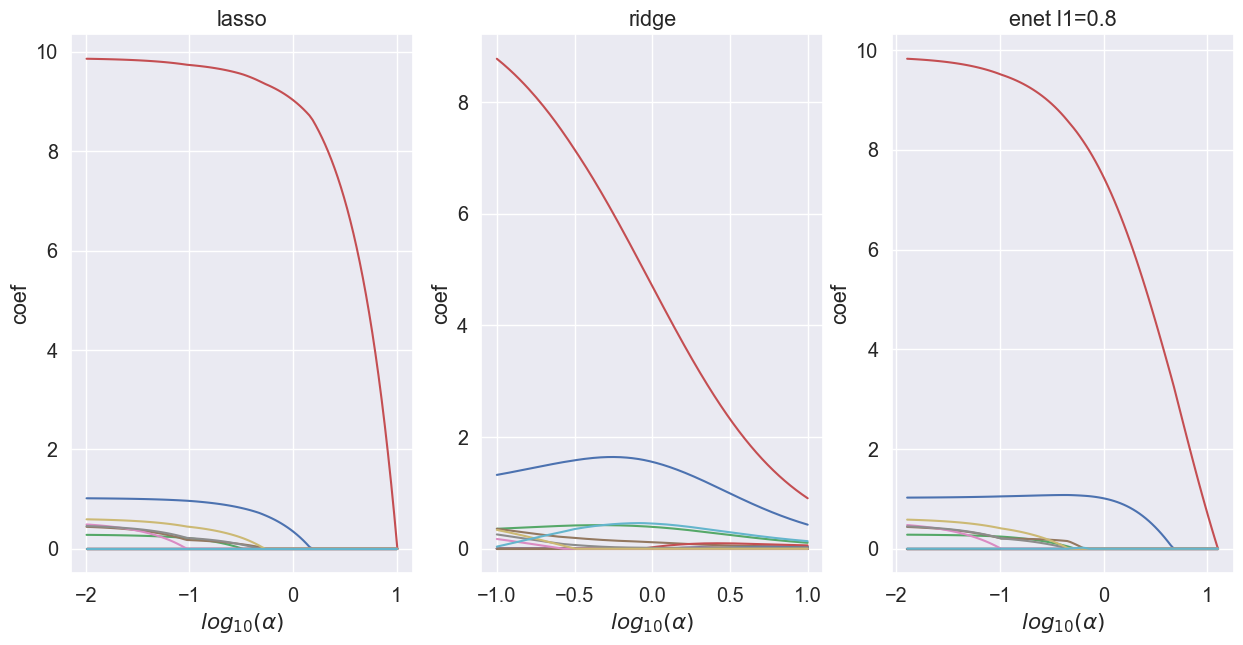

In [20]:
from sklearn.linear_model import lasso_path, enet_path
eps=1e-3

fig,ax=plt.subplots(1,3,figsize=(15,7))

alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, eps=eps,positive=True)
neg_log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    ax[0].plot(neg_log_alphas_lasso, coef_l)

ax[0].set(xlabel=r'$log_{10}(\alpha)$', ylabel='coef', title='lasso')

alphas_ridge, coefs_ridge, _   = enet_path(X_train, y_train,l1_ratio=1e-5, alphas=np.linspace(1e-1,10,1000),eps=eps,positive=True)

neg_log_alphas_ridge = np.log10(alphas_ridge)

for coef_r in coefs_ridge:
    ax[1].plot(neg_log_alphas_ridge, coef_r)

ax[1].set(xlabel=r'$log_{10}(\alpha)$', ylabel='coef', title='ridge')

alphas_enet, coefs_enet, _ = enet_path(X_train, y_train,l1_ratio=0.8, eps=eps,positive=True)

neg_log_alphas_enet = np.log10(alphas_enet)

for coef_e in coefs_enet:
    ax[2].plot(neg_log_alphas_enet, coef_e)

ax[2].set(xlabel=r'$log_{10}(\alpha)$', ylabel='coef', title='enet l1=0.8')
None

**Ответ:** Lasso "резко" исключает признаки при возрастании параметра регуляризации. Имеем плато до критического значения $\alpha$, далее коэффициент убывает.

Ridge - "плавнее". У Ridge нет плато, зависимость в общем случае не монотонна. Некоторые коэффициенты могут приобретать значение с ростом параметра регуляризации.

ElasticNet объединяют подходы. Коэффициенты с большим значением убывают как лассо, с малым - как ridge.

Зависимость от $\alpha$ для приведенных регуляризаций выпукла вниз 

Оптимальные параметры в индустрии определяются кроссвалидацией. Также существует байесовский подход, максимизируюший evidence модели. Коэффициенты регуляризации подбираются под каждый параметр индивидуально. Мктод -Relevance Vector Machine. Подробно в лекции ФКН от Дмитрия Ветрова:  https://www.youtube.com/watch?v=AiLg8WuiEUc&list=PLEqoHzpnmTfCiJpMPccTWXD9DB4ERQkyw&index=5



#### **Профиль физика и профиль химия**

Загрузите данные с <a href="https://miptstats.github.io/courses/ad_mipt.html">сайта</a>. Данные были предобработаны и сокращены для более быстрой работы алгоритмов предсказания, так как в этом задании их будет большое кол-во. С исходными данными вы можете ознакомиться <a href="https://www.kaggle.com/datasets/burakhmmtgl/energy-molecule">здесь</a>.

В таблице находятся записи в кулоновской матрице (сокращенный вид), которые действуют как молекулярные признаки. 300-я колонка — это Pubchem Id, по этому числу вы можете понять, для какой молекулы приведены числа (этот столбец для обучения не нужен). 301-й столбец — это энергия распыления, рассчитанная путем моделирования с использованием пакета Quantum Espresso, этот столбец и является целевой переменной.

*Для интересующихся: cнижение размерности пространства признаков проводилось с помощью <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">метода главных компонент</a>*

In [21]:
data = pd.read_csv('physics_data.csv',index_col=[0])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,pubchem_id,Eat
0,-54.825075,-0.835719,45.240515,-22.585658,1.450320,-16.223986,12.376342,13.424011,-4.923189,-2.653680,...,-0.023466,-0.066633,0.030779,-0.036064,-0.008572,0.011805,-0.036215,0.052180,25004,-19.013763
1,-34.039832,24.930703,-7.485562,40.737762,21.400170,15.280596,4.467203,-19.296032,-0.433598,18.387221,...,-0.000419,0.003369,-0.000641,-0.001035,0.012597,0.004377,0.004023,0.003356,25005,-10.161019
2,-58.794258,-49.823448,-35.062080,1.698937,-18.012227,12.523468,9.210336,7.488163,11.392693,-0.927953,...,-0.003377,-0.003500,0.002734,-0.001017,0.004774,0.012796,0.022270,0.008051,25006,-9.376619
3,-38.508716,19.211767,-4.858507,10.484105,16.622411,-22.131178,-14.876963,-5.516521,13.793978,3.657935,...,-0.001423,-0.000576,0.011144,-0.007253,-0.006700,-0.007940,0.022492,-0.007016,25009,-13.776438
4,-45.432604,-23.951574,-55.340413,-7.879883,-16.304009,13.340896,11.326496,6.784151,11.208725,-0.181278,...,0.008307,-0.003005,0.000816,-0.000938,0.001135,-0.005256,0.001042,0.002651,25011,-8.537140


Разделите данные на признаки $X$ и целевые переменные $y$.

In [22]:
X, y = data.iloc[:,:300],data['Eat']

Разделите выборку в отношении 7:3. Далее везде вплоть до сравнения моделей используйте обучающую выборку.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Методы с регуляризацией требуют страндартизации признаков. Поясните, почему это необходимо.

**Ответ:**
Масштабы numreric полей могут различаться в десятки раз. Целевой признак - один. Соответственно, коэффициенты при признаках имеют разный масштаб. При регуляризации штрафуем коэффициенты при признаках с равным штрафом. Таким образом, можем исключить важные для моделирования признаки. Для соблюдения равных условий перед регуляризацией выполняем стандартизацию $\frac{x-\mu}{s}$.



Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>, обученный на обучающей выборке.

In [24]:
X_train_stand = StandardScaler().fit(X_train)
X_train = X_train_stand.transform(X_train)
X_test = X_train_stand.transform(X_test)

**2.** Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. Используйте функции `calculate_coefs` и `draw_track`, реализованные в самом начале этой задачи.

Нарисуйте графики. Предложите диапазоны значений, где стоило бы искать **оптимальные** параметры регуляризации.

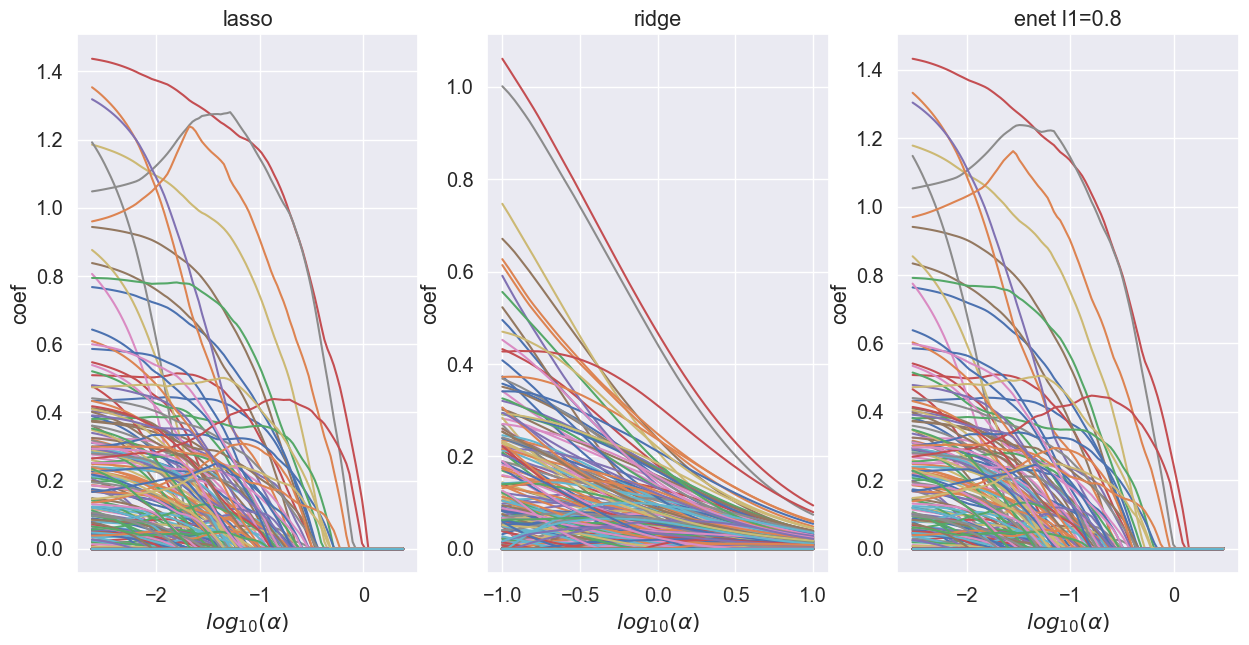

In [25]:
from sklearn.linear_model import lasso_path, enet_path
eps=1e-3

fig,ax=plt.subplots(1,3,figsize=(15,7))

alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, eps=eps,positive=True)
neg_log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    ax[0].plot(neg_log_alphas_lasso, coef_l)

ax[0].set(xlabel=r'$log_{10}(\alpha)$', ylabel='coef', title='lasso')

alphas_ridge, coefs_ridge, _   = enet_path(X_train, y_train,l1_ratio=1e-5, alphas=np.linspace(1e-1,10,1000),eps=eps,positive=True)

neg_log_alphas_ridge = np.log10(alphas_ridge)

for coef_r in coefs_ridge:
    ax[1].plot(neg_log_alphas_ridge, coef_r)

ax[1].set(xlabel=r'$log_{10}(\alpha)$', ylabel='coef', title='ridge')

alphas_enet, coefs_enet, _ = enet_path(X_train, y_train,l1_ratio=0.8, eps=eps,positive=True)

neg_log_alphas_enet = np.log10(alphas_enet)

for coef_e in coefs_enet:
    ax[2].plot(neg_log_alphas_enet, coef_e)

ax[2].set(xlabel=r'$log_{10}(\alpha)$', ylabel='coef', title='enet l1=0.8')
None

**Ответ:**  Lasso "резко" исключает признаки при возрастании параметра регуляризации. Имеем плато до критического значения $\alpha$, далее коэффициент убывает.

Ridge - "плавнее". У Ridge нет плато, зависимость в общем случае не монотонна. Некоторые коэффициенты могут приобретать значение с ростом параметра регуляризации.

ElasticNet объединяют подходы. Коэффициенты с большим значением убывают как лассо, с малым - как ridge.

Зависимость от $\alpha$ для приведенных регуляризаций выпукла вниз 

Оптимальные параметры в индустрии определяются кроссвалидацией. Также существует байесовский подход, максимизируюший evidence модели. Коэффициенты регуляризации подбираются под каждый параметр индивидуально. Мктод -Relevance Vector Machine. Подробно в лекции ФКН от Дмитрия Ветрова:  https://www.youtube.com/watch?v=AiLg8WuiEUc&list=PLEqoHzpnmTfCiJpMPccTWXD9DB4ERQkyw&index=5



#### <b><font color="orange">Сложная часть</font></b>
### Задача 3


Эта задание является продолжением предыдущего. Здесь не нужно загружать новые данные, продолжайте работать с выбранными вами данными.

**1.** Для Elastic исследуйте зависимость от параметра `l1_ratio`. Постройте график изменения весов признаков в зависимости от `l1_ratio` для первых 20 признаков из датасета. 

[0.001      0.00215443 0.00464159 0.01       0.02154435 0.04641589
 0.1        0.21544347 0.46415888 1.        ]


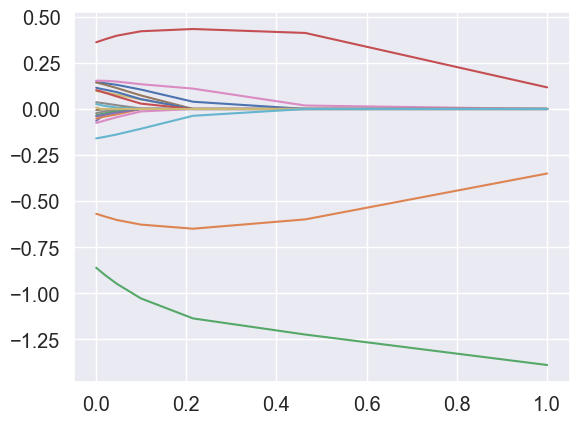

In [26]:
import numpy as np
from sklearn.linear_model import ElasticNet

l1_ratios = np.logspace(-3,0,10)
print(l1_ratios)
coefs = []

for l1_ratio  in l1_ratios:
    model = ElasticNet(l1_ratio=l1_ratio).fit(X_train,y_train)
    coefs.append(model.coef_[:20])


plt.plot(l1_ratios,coefs)
None

Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

**Вывод:** искал бы в диапазоне от 0.5 до 1.0. В этом диапазоне отобраны ключевые для моделирования признаки. Прочие коэффициенты имеют близкие к нулю значения. Уточнить параметр регуляризации можно с помощью кросс-валидации

**2.** Проиллюстрируйте, как меняется качество предсказания моделей при изменении параметра `alpha`. Возьмите `Ridge`, `Lasso` и 3 `ElasticNet` с разными фиксированными значениями `l1_ratio` &mdash; вы будете исследовать 5 моделей с регуляризацией и 1 без нее.

Сначала посчитайте ошибки для линейной регрессии без регуляризации.

In [27]:
from sklearn.linear_model import LinearRegression
l_model = LinearRegression().fit(X=X_train, y=y_train)
pred = l_model.predict(X_test)
linreg = {}
linreg['MSE'] = mean_squared_error(y_test, pred)
linreg['MAE'] = mean_absolute_error(y_test, pred)
linreg['MAPE'] = mean_absolute_percentage_error(y_test, pred)

Реализуйте функцию для отрисовки изменения величины ошибки от параметра регуляризации. 

In [28]:
def draw_errors(error, error_name, alphas):

    """
    Функция строит график зависимости величины ошибки от параметра alpha для разных моделей
    
    error - функция, вычисляющая ошибку
    error_name - имя функции, вычисляющей ошибку (одно из 'MSE', 'MAE', 'MAPE')
    alphas - массив величин alpha
    """

    plt.plot(alphas, error, label=error_name)



Постройте графики для MSE, MAE и MAPE. Возьмите предложенный массив `alphas`.

In [29]:
alphas = np.logspace(-2, 8, 20)

In [50]:
models = [Ridge,Lasso]+ [ElasticNet]*3
model_names = ['Ridge','Lasso','ElasticNet,l1_ratio=0.25','ElasticNet,l1_ratio=0.5','ElasticNet,l1_ratio=0.75'] 
model_params = [{},{},{"l1_ratio" : 0.25},{"l1_ratio": 0.5},{"l1_ratio": 0.75}]
results = {
    'MSE' : {},
    'MAE': {},
    'MAPE': {},
}

for model,model_name,model_param in zip(models,model_names,model_params):
    MSEs, MAEs, MAPEs = [],[],[]
    for alpha in alphas:
        pred = model(alpha=alpha,**model_param).fit(X_train,y_train).predict(X=X_test)
        MSEs.append(mean_squared_error(y_test, pred))
        MAEs.append(mean_absolute_error(y_test, pred))
        MAPEs.append(mean_absolute_percentage_error(y_test, pred))
    results['MSE'][model_name] = MSEs
    results['MAE'][model_name] = MAEs
    results['MAPE'][model_name] = MAPEs

Оцените по графикам, в каких диапазонах достигается наилучшее качетсво предсказания моделей. Постройте графики для более узкого диапазона, чтобы сравнить модели более детально.

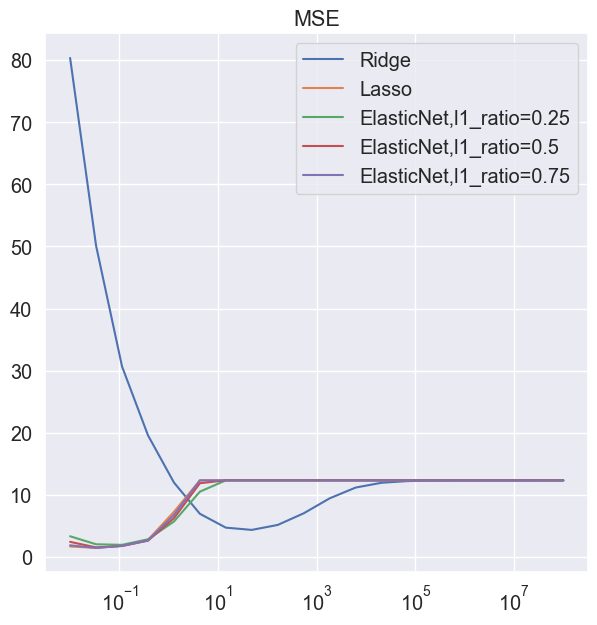

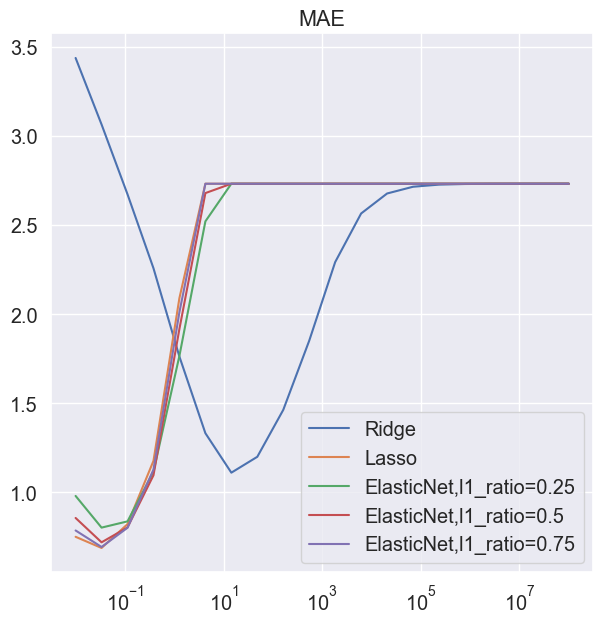

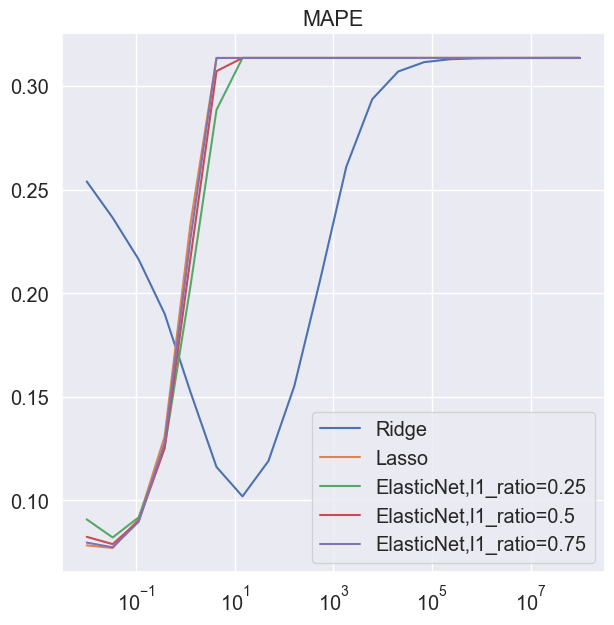

In [55]:
for error_type in results.keys(): 
    plt.figure(figsize=(7,7))   
    for key, value in results[error_type].items():
        plt.plot(alphas,value,label=key)
    plt.xscale(value='log')
    plt.legend()
    plt.title(error_type)
    plt.plot()

**3.** Сделайте общий вывод по задаче.

**Вывод:** Ridge регуляризация при малых значениях alpha неэффективна. Для Lasso и ElasticNet большие значениях alpha регуляризация избыточна, ошибки моделирования возрастают. 

### Задача 4
Во взвешенном методе наименьших квадратов каждому наблюдению задается некоторый известный вес $w_i$. Задача имеет вид: $$\sum\limits_{i=1}^n w_i\left(Y_i - x_i^T \theta\right)^2 \to \min\limits_\theta$$ Найдите решение задачи в матричном виде.


Weighted MSE в матричном виде:

$ (Y-X\theta)^T W (Y-X\theta) = Y^TWY - Y^TWX\theta-\theta^TX^TWY+\theta^TX^TWX\theta$

,где $W$ - диагональная матрица с весами $w_i$, заполняющими диагональ.

Дифференцируем по $\theta$ и приравниваем к нулю:

$-2 X^TWY +2 X^TWX\theta = 0$

$\theta = (X^TWX)^{-1}X^TWY$
